In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [46]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path ='./Data/test/'
valid_path = './Data/train/'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('./Data/train/*')


In [7]:
folders

['./Data/train\\Hibiscus',
 './Data/train\\Jasmine',
 './Data/train\\Pine tree',
 './Data/train\\Rose',
 './Data/train\\Tulsi']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./Data/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5201 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory("./Data/train/",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5201 images belonging to 5 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=10,
  validation_steps=10
)

Epoch 1/30
10/10 [==============================] - 76s 8s/step - loss: 1.4366 - accuracy: 0.4906 - val_loss: 1.7254 - val_accuracy: 0.3969
Epoch 2/30
10/10 [==============================] - 68s 7s/step - loss: 1.3163 - accuracy: 0.5344 - val_loss: 1.0791 - val_accuracy: 0.6344
Epoch 3/30
10/10 [==============================] - 69s 7s/step - loss: 1.5751 - accuracy: 0.5213 - val_loss: 3.2244 - val_accuracy: 0.3688
Epoch 4/30
10/10 [==============================] - 70s 7s/step - loss: 2.0517 - accuracy: 0.4344 - val_loss: 1.8277 - val_accuracy: 0.4906
Epoch 5/30
10/10 [==============================] - 75s 8s/step - loss: 1.3909 - accuracy: 0.5281 - val_loss: 1.3492 - val_accuracy: 0.5344
Epoch 6/30
10/10 [==============================] - 92s 10s/step - loss: 1.3835 - accuracy: 0.5031 - val_loss: 1.4901 - val_accuracy: 0.5562
Epoch 7/30
10/10 [==============================] - 88s 9s/step - loss: 1.4348 - accuracy: 0.5562 - val_loss: 1.7712 - val_accuracy: 0.5281
Epoch 8/30
10/10 [=

In [16]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\yashm\anaconda3\envs\tfod\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [25]:
# y_pred = model.predict(test_set)

In [26]:
# y_pred

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image

In [35]:
model=load_model('model_resnet50.h5')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

imagePath = "./Data/train/Rose/IMG20211108070232_BURST000_COVER.jpg"
test_image = image.load_img(imagePath, target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
result
max(result)

array([8.1593627e-03, 6.0513435e-06, 1.6461328e-10, 3.8817579e-05,
       9.9179584e-01], dtype=float32)

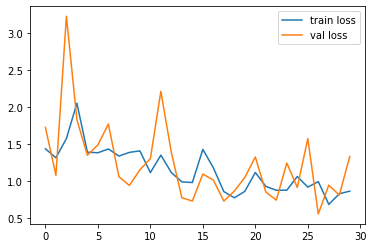

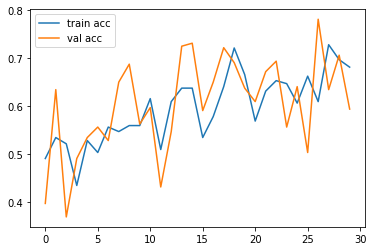

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Image Prediction

In [68]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image

image = Image.open('./Data/validation/Hibiscus/IMG20211105160450_BURST019.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
prediction

array([[9.7762257e-01, 2.1111200e-02, 1.2138637e-03, 5.8657919e-11,
        5.2282965e-05]], dtype=float32)

In [69]:
result = np.where(prediction == np.amax(prediction))

In [70]:
val = result[1][0]
if val==0:
    print("HIBISCUS")
elif val==1:
    print("JASMINE")
elif val==2:
    print("PINE TREE")
elif val==3:
    print("ROSE")
elif val==4:
    print("TULSI")

HIBISCUS
